## Final Project Submission

Please fill out:
* Student name: Peggy Atieno Obam
* Student pace: part time 
* Scheduled project review date/time: 
* Instructor name: Diana Mongina/Noah Kandie
* Blog post URL:

## INTRODUCTION


This proposition includes an evaluation of different movie information aimed at guiding executive decision-making for Microsoft's hypothetical new movie studio. The analysis offers practical recommendations on the kinds of films the studio should prioritize making in order to achieve the highest possible box office success. The primary findings indicate that box office revenues are linked to genre, duration, and rating. By utilizing this analysis, Microsoft can generate successful films and establish its new studio as a profitable and competitive entity within the film industry.

## BUSINESS PROBLEM

Microsoft has noticed that major companies are producing unique video content and they are interested in joining the trend. They have concluded to launch a novel movie production studio. However, they lack knowledge in film-making. My task is to investigate the types of movies that are presently performing well at the box office. Afterward, I will interpret the results into useful information that can assist the leader of Microsoft's new movie studio in determining the type of movies to generate.

## OBJECTIVES

* To determine if there is any correlation between production budget and profit of a movie
* To determine which movie title has the highest total gross
* To determine which genre of movie has the highest rating
* To determine which movie titles are the most profitable


## 1.LOADING DATASET

In [1]:
#Importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")


Opening the all the datasets to see what I am working with.

In [2]:
bom_movie_gross = pd.read_csv('Data/bom.movie_gross.csv')
bom_movie_gross


,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010
...,...,...,...,...,...
3382,The Quake,Magn.,6200.0,NaN,2018
3383,Edward II (2018 re-release),FM,4800.0,NaN,2018
3384,El Pacto,Sony,2500.0,NaN,2018
3385,The Swan,Synergetic,2400.0,NaN,2018


In [3]:
tmdb_movies = pd.read_csv('Data/tmdb.movies.csv')
tmdb_movies

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186
...,...,...,...,...,...,...,...,...,...,...
26512,26512,"[27, 18]",488143,en,Laboratory Conditions,0.600,2018-10-13,Laboratory Conditions,0.0,1
26513,26513,"[18, 53]",485975,en,_EXHIBIT_84xxx_,0.600,2018-05-01,_EXHIBIT_84xxx_,0.0,1
26514,26514,"[14, 28, 12]",381231,en,The Last One,0.600,2018-10-01,The Last One,0.0,1
26515,26515,"[10751, 12, 28]",366854,en,Trailer Made,0.600,2018-06-22,Trailer Made,0.0,1


In [4]:
movie_budgets =  pd.read_csv('Data/tn.movie_budgets.csv')
movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [5]:
rt_movie_info = pd.read_csv('Data/rt.movie_info.tsv', delimiter="\t")
rt_movie_info


,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1555,1996,Forget terrorists or hijackers -- there's a ha...,R,Action and Adventure|Horror|Mystery and Suspense,NaN,NaN,"Aug 18, 2006","Jan 2, 2007",$,"33,886,034",106 minutes,New Line Cinema
1556,1997,The popular Saturday Night Live sketch was exp...,PG,Comedy|Science Fiction and Fantasy,Steve Barron,Terry Turner|Tom Davis|Dan Aykroyd|Bonnie Turner,"Jul 23, 1993","Apr 17, 2001",NaN,NaN,88 minutes,Paramount Vantage
1557,1998,"Based on a novel by Richard Powell, when the l...",G,Classics|Comedy|Drama|Musical and Performing Arts,Gordon Douglas,NaN,"Jan 1, 1962","May 11, 2004",NaN,NaN,111 minutes,NaN
1558,1999,The Sandlot is a coming-of-age story about a g...,PG,Comedy|Drama|Kids and Family|Sports and Fitness,David Mickey Evans,David Mickey Evans|Robert Gunter,"Apr 1, 1993","Jan 29, 2002",NaN,NaN,101 minutes,NaN


In [6]:
rt_reviews_tsv = pd.read_csv('Data/rt.reviews.tsv', delimiter="\t", encoding='windows-1254')
rt_reviews_tsv

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
54427,2000,The real charm of this trifle is the deadpan c...,NaN,fresh,Laura Sinagra,1,Village Voice,"September 24, 2002"
54428,2000,NaN,1/5,rotten,Michael Szymanski,0,Zap2it.com,"September 21, 2005"
54429,2000,NaN,2/5,rotten,Emanuel Levy,0,EmanuelLevy.Com,"July 17, 2005"
54430,2000,NaN,2.5/5,rotten,Christopher Null,0,Filmcritic.com,"September 7, 2003"


In [7]:
#Opening movie_ratings from SQL data set
conn = sqlite3.connect('Data/im.db')
movie_rating=pd.read_sql("""SELECT *
                     FROM movie_ratings;""", conn)
movie_rating

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21
...,...,...,...
73851,tt9805820,8.1,25
73852,tt9844256,7.5,24
73853,tt9851050,4.7,14
73854,tt9886934,7.0,5


In [8]:
#Opening movive_basics from the SQL data set
movie_basics=pd.read_sql("""SELECT *
                     FROM movie_basics;""", conn)
movie_basics.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


## 2. EXPLORATORY DATA ANALYSIS

Going back to the objective, I want to explore on the different datasets that have gross margin profit for movies, the genres and budget needed

In [9]:
#checking missing values  and data type in the bom_movie_gross dataset
bom_movie_gross.info()
bom_movie_gross.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


,domestic_gross,year
count,3.359000e+03,3387.000000
mean,2.874585e+07,2013.958075
std,6.698250e+07,2.478141
min,1.000000e+02,2010.000000
25%,1.200000e+05,2012.000000
50%,1.400000e+06,2014.000000
75%,2.790000e+07,2016.000000
max,9.367000e+08,2018.000000


From the above analysis i can see that foreign gross,domestic gross and studio have missing values.Foreign gross is also not in the correct data types.

In [10]:
#checking for missing values and data type in the movie_budgets dataset
movie_budgets.info()
movie_budgets.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


,id
count,5782.000000
mean,50.372363
std,28.821076
min,1.000000
25%,25.000000
50%,50.000000
75%,75.000000
max,100.000000


The movie_budgets dataset has production_budget and worldwide_gross, which will help me achieve my objective of finding the correlation between budget and profit made from a movie. Also, to note is that it does not have any missing values

In [11]:
movie_basics.info()
movie_basics.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


,start_year,runtime_minutes
count,146144.000000,114405.000000
mean,2014.621798,86.187247
std,2.733583,166.360590
min,2010.000000,1.000000
25%,2012.000000,70.000000
50%,2015.000000,87.000000
75%,2017.000000,99.000000
max,2115.000000,51420.000000


The movie_basics dataset contains genres, which will help in understanding the most common genre

In [12]:
movie_rating.info()
movie_rating.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


,averagerating,numvotes
count,73856.000000,7.385600e+04
mean,6.332729,3.523662e+03
std,1.474978,3.029402e+04
min,1.000000,5.000000e+00
25%,5.500000,1.400000e+01
50%,6.500000,4.900000e+01
75%,7.400000,2.820000e+02
max,10.000000,1.841066e+06


The movie_rating contains movie id and average rating and votes of the most liked movie

## 3. DATA CLEANING

In [13]:
#join the moving rating data set and movie basics since they both have movie_id
joint_genre = movie_basics.join(movie_rating.set_index('movie_id'),
                                   how = 'inner', on = 'movie_id', rsuffix = 'r')
joint_genre.head()


,movie_id,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama",7.0,77
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama",7.2,43
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama,6.9,4517
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama",6.1,13
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy",6.5,119


In [14]:
joint_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73856 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         73856 non-null  object 
 1   primary_title    73856 non-null  object 
 2   original_title   73856 non-null  object 
 3   start_year       73856 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           73052 non-null  object 
 6   averagerating    73856 non-null  float64
 7   numvotes         73856 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 5.1+ MB


In [15]:
joint_genre.isna().sum()

movie_id              0
primary_title         0
original_title        0
start_year            0
runtime_minutes    7620
genres              804
averagerating         0
numvotes              0
dtype: int64

In [16]:
#dropping the runtime_minutes column because it has so many missing values

joint_genre.dropna(subset=['runtime_minutes'],inplace=True)
joint_genre.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66236 entries, 0 to 146134
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   movie_id         66236 non-null  object 
 1   primary_title    66236 non-null  object 
 2   original_title   66236 non-null  object 
 3   start_year       66236 non-null  int64  
 4   runtime_minutes  66236 non-null  float64
 5   genres           65720 non-null  object 
 6   averagerating    66236 non-null  float64
 7   numvotes         66236 non-null  int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 4.5+ MB


In [17]:
#Find the most popular genre based on average ratings
most_popular_genre = joint_genre.loc[0:25, ['genres', 'averagerating']].groupby('genres').mean().sort_values('averagerating', ascending=False).index.tolist()
most_popular_genre

['Adventure,Animation,Comedy',
 'Animation,Drama,History',
 'Documentary',
 'Biography,Drama',
 'Action,Crime,Drama',
 'Drama',
 'Comedy,Drama,Fantasy',
 'Biography,Comedy,Drama',
 'History',
 'Drama,Mystery',
 'Action,Animation,Comedy']

Based on the average rating, the most popular genre is "Adventure,Animation,Comedy", "Animation, Drama, History" and "Documentary" among others

### Cleaning movie_budgets data set by removing  dollar sign and comma

In [18]:
#removing comma and $ sign in worldwide_gross and changing it to a float
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace(',', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].str.replace('$', '')
movie_budgets['worldwide_gross'] = movie_budgets['worldwide_gross'].astype(float)

In [19]:
#removing comma and $ sign in domestic_gross and changing it to a integer
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace(',', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].str.replace('$', '')
movie_budgets['domestic_gross'] = movie_budgets['domestic_gross'].astype(int)

In [20]:
#removing comma and $ sign in production_budget and changing it to a integer
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace(',', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].str.replace('$', '')
movie_budgets['production_budget'] = movie_budgets['production_budget'].astype(int)

In [21]:
#Confirm that the $ and comma are removed from the data set
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09


In [22]:
#creating new column for profit and profit margin so as to know how much profit is for each movie
movie_budgets['Profit'] = movie_budgets['worldwide_gross'] - movie_budgets['production_budget']

movie_budgets['Profit_Margin'] = (movie_budgets['worldwide_gross'] - 
                                    movie_budgets['production_budget'])/movie_budgets['worldwide_gross']

In [23]:
#Confirming that the columns were added for profit and proft margin
movie_budgets.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit,Profit_Margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,2.351345e+09,0.846921
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1.045664e+09,6.350639e+08,0.607331
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,1.497624e+08,-2.002376e+08,-1.337036
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.072414e+09,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,9.997217e+08,0.759251


The dataset now shows the profit and profit margin for each movie

### Data cleaning on bom_movie_gross data set

In [24]:
#Fill NaN values with 0 and find total gross
bom_movie_gross["foreign_gross"]=bom_movie_gross["foreign_gross"].fillna(0)
bom_movie_gross["foreign_gross"] = pd.to_numeric(bom_movie_gross["foreign_gross"], errors='coerce')
bom_movie_gross['Total_gross'] = bom_movie_gross['domestic_gross'] + bom_movie_gross['foreign_gross']
bom_movie_gross.sort_values('Total_gross', ascending= False).head(5)

,title,studio,domestic_gross,foreign_gross,year,Total_gross
727,Marvel's The Avengers,BV,623400000.0,895500000.0,2012,1.518900e+09
1875,Avengers: Age of Ultron,BV,459000000.0,946400000.0,2015,1.405400e+09
3080,Black Panther,BV,700100000.0,646900000.0,2018,1.347000e+09
328,Harry Potter and the Deathly Hallows Part 2,WB,381000000.0,960500000.0,2011,1.341500e+09
2758,Star Wars: The Last Jedi,BV,620200000.0,712400000.0,2017,1.332600e+09


## 4. DATA ANALYSIS

### 1. Is there any correlation between production_budget and profit?

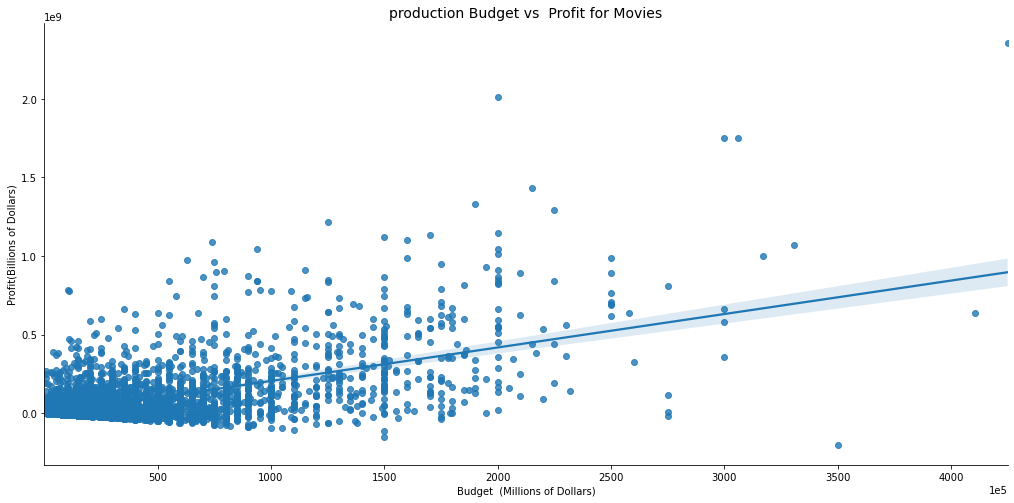

In [25]:
#determining the relationship between budget and profit
ax1 = sns.lmplot(x='production_budget', y='Profit', data=movie_budgets, height=7, aspect=2)

plt.xlabel('Budget  (Millions of Dollars)', fontsize=10)
plt.ticklabel_format(axis='x', style='sci', scilimits=(5,5))
plt.ylabel('Profit(Billions of Dollars)', fontsize=10)
plt.title('production Budget vs  Profit for Movies', fontsize=14)
plt.savefig('BudgetVProfit');

The scatter plot above shows that there is a weak positive correlation.As the budget increases the profit also increases. However, there some outliers in the data 

### 2. Which movie title has the highest total gross?

<function matplotlib.pyplot.show(close=None, block=None)>

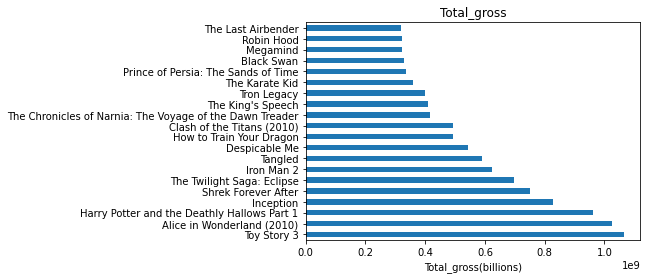

In [26]:
#bar graph to see highest gross profit
bom_movie_gross.head(20).plot.barh("title","Total_gross")
plt.title("Total_gross")
plt.xlabel("Total_gross(billions)")
plt.ylabel("")
plt.legend().remove()
plt.show

Toy story,Alice in Wonderland(2010) and Harry Potter and the Deathly Hallows part 1 have the highest total gross.

### 3. Which genre of movie has the highest rating?

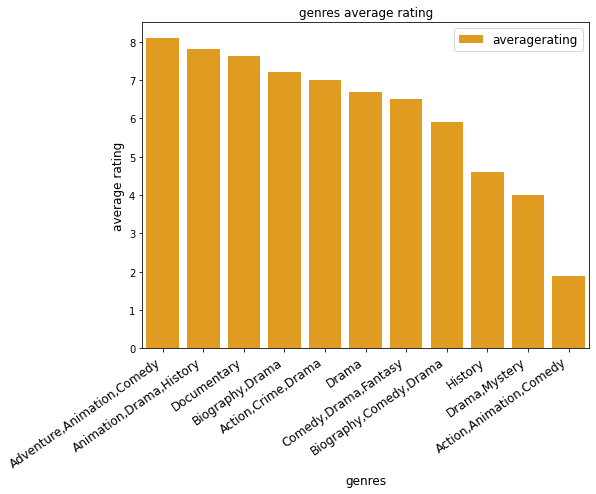

In [27]:
# sort the genres by average rating in descending order
genres_sorted = joint_genre.loc[0:25, ['genres', 'averagerating']].groupby('genres').mean().sort_values('averagerating', ascending=False).index.tolist()

plt.figure(figsize=(8,6))

# add the order parameter to the barplot method
sns.barplot(x=joint_genre.loc[0:25, 'genres'], y=joint_genre.loc[0:25, 'averagerating'], 
            color='orange', label='averagerating', ci=None, order=genres_sorted)

plt.xlabel('genres', fontsize=12)
plt.title("genres average rating", fontsize=12)
plt.ylabel('average rating', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)

plt.savefig('genres vs average rating')

'Adventure, Animation, Comedy','Animation,Drama,History' and 'Documentary are the highest rated as per the above analysis meaning that they are the most liked.


## 4. What are the most profitable movie titles?

In [28]:
movie_budgets.loc[0:25].sort_values('Profit', ascending=False)

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross,Profit,Profit_Margin
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2.776345e+09,2.351345e+09,0.846921
6,7,"Apr 27, 2018",Avengers: Infinity War,300000000,678815482,2.048134e+09,1.748134e+09,0.853525
5,6,"Dec 18, 2015",Star Wars Ep. VII: The Force Awakens,306000000,936662225,2.053311e+09,1.747311e+09,0.850972
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1.403014e+09,1.072414e+09,0.764364
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1.316722e+09,9.997217e+08,0.759251
22,23,"Apr 14, 2017",The Fate of the Furious,250000000,225764765,1.234846e+09,9.848463e+08,0.797546
16,17,"May 6, 2016",Captain America: Civil War,250000000,408084349,1.140069e+09,8.900694e+08,0.780715
10,11,"Jul 20, 2012",The Dark Knight Rises,275000000,448139099,1.084439e+09,8.094391e+08,0.746413
18,19,"Dec 14, 2012",The Hobbit: An Unexpected Journey,250000000,303003568,1.017004e+09,7.670036e+08,0.754180
20,21,"Dec 13, 2013",The Hobbit: The Desolation of Smaug,250000000,258366855,9.603669e+08,7.103669e+08,0.739683


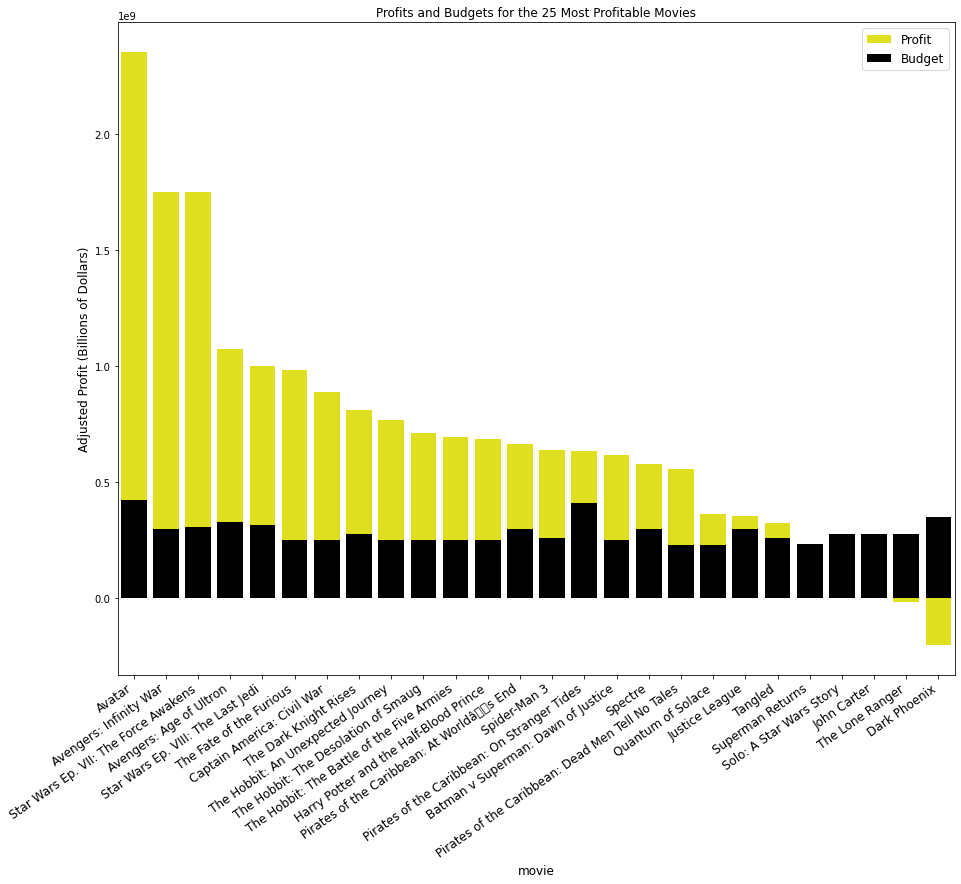

In [29]:
#plotting the 25 most profitable movies
x = movie_budgets.loc[0:25].sort_values('Profit', ascending=False)

plt.figure(figsize=(15,12))
sns.barplot(x=x['movie'],y=x['Profit'], 
            color='yellow', label='Profit', ci=None)
sns.barplot(x=x['movie'],y=x['production_budget'], 
            color='black', label='Budget', ci=None)
plt.xlabel('movie', fontsize=12)
plt.title("Profits and Budgets for the 25 Most Profitable Movies", fontsize=12)
plt.ylabel('Adjusted Profit (Billions of Dollars)', fontsize=12)
plt.xticks(rotation=35, horizontalalignment='right', fontsize=12)
plt.legend(fontsize=12)
plt.savefig('ProfitBudgetTop25');

Based on the above, Avatar and Avengers:Infinity War are the most profitable movies while Dark Phoenix incurred losses.

##  5. CONCLUSION AND RECOMMENDATIONS

-In conclusion, the scatter plot analysis indicates a weak positive correlation between production_budget and profit, suggesting that investing more in a movie production does not guarantee high profits. 
-It is also noteworthy that movies such as Toy Story, Alice In Wonderland(2010), and Harry Potter and the Deathly Hallows have generated the highest total gross, while "Adventure, Animation, Comedy", and "Animation, Drama, History" are the most popular genres.

Furthermore, Avatar and Avengers:Infinity War have proved to be the most profitable movies, while Dark Phoenix incurred losses. 

From this analysis,I would recommended Microsoft to consider factors beyond budget when deciding on movie production. Additionally, investing in popular genres such as "adventure, animation,comedy", among others, could lead to more significant profits. Finally, attention to detail and careful consideration of the target audience (according to the genre_ratings) is crucial in ensuring that a movie achieves commercial success.